In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

rs = np.random.RandomState(seed=10)

# Problem 1

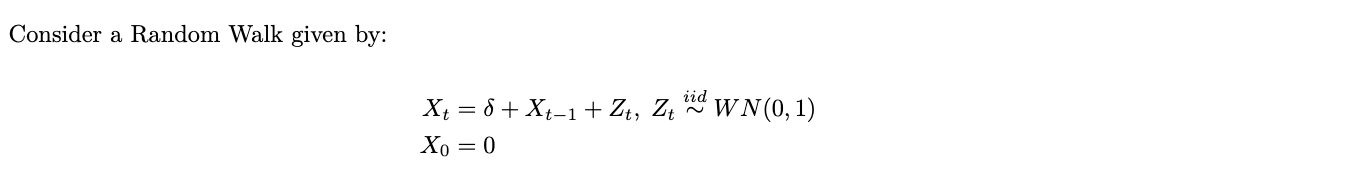

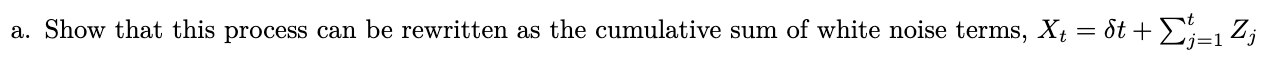

#### See appendix 1.a

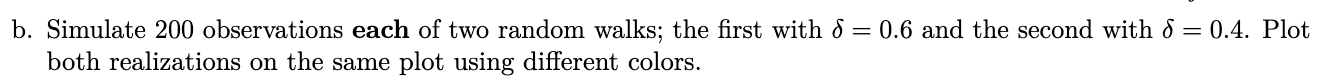

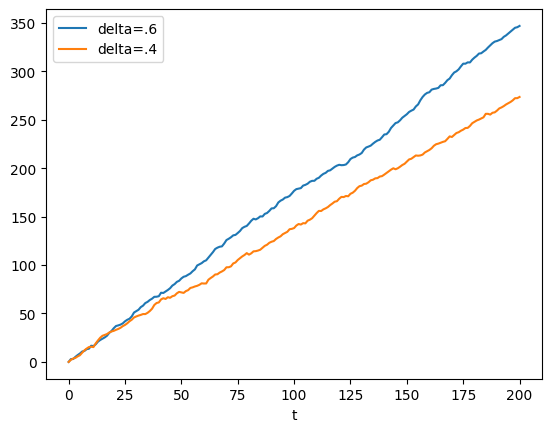

In [2]:
delta = [.6, .4]
X = pd.DataFrame(columns = ['delta=.6', 'delta=.4'],index = range(201))
X.loc[0] = [0,0]

for t in range(1,201):
    for j in range(2):
        X.loc[t][j] = delta[j] + X.loc[t-1][j] + sp.norm.rvs(loc=1,scale=1,random_state=rs)

plt.plot(range(201), X['delta=.6'], label='delta=.6')
plt.plot(range(201), X['delta=.4'], label='delta=.4')
plt.legend()
plt.xlabel('t')
plt.show()

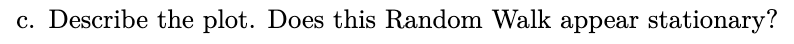

#### Clearly it is not stationary since it does not have a constant mean over time, which is due to the delta term.

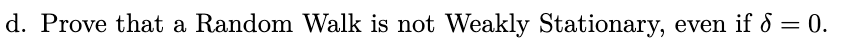

#### See appendix 1.d

# Question 2

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

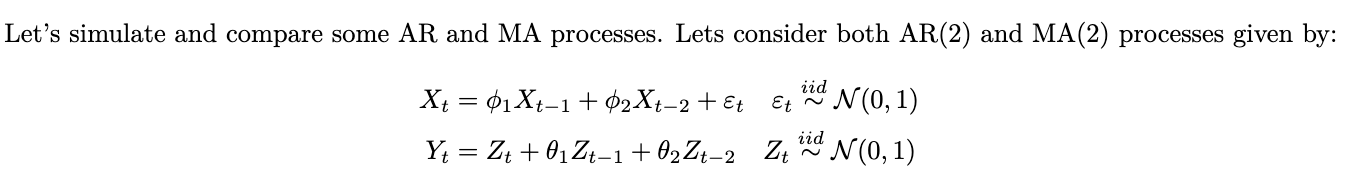

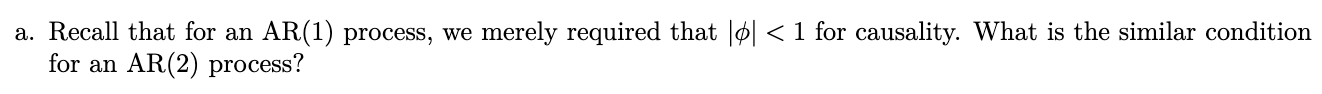

#### See appendix 2.a

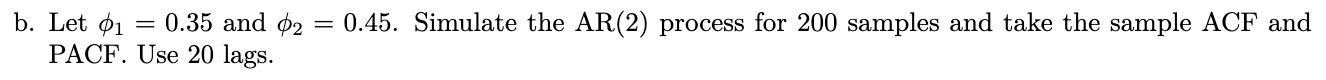

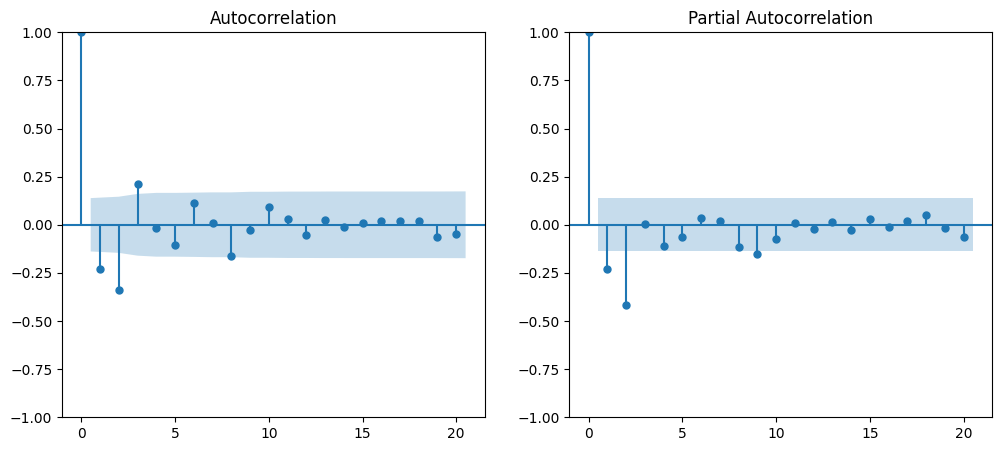

In [4]:
np.random.seed(10)

ar_params = [1, .35, .45] #Form of AR(2)
ma_prams = [1] #Represents MA(0)

ar_2 = ArmaProcess(ar=ar_params, ma=ma_prams)

simulated_ar_2 = ar_2.generate_sample(nsample=200)

sample_acf = acf(simulated_ar_2, nlags=20)
sample_PACF = pacf(simulated_ar_2, nlags=20)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
plot_acf(simulated_ar_2, ax=ax1, lags=20);
plot_pacf(simulated_ar_2, ax=ax2, lags=20);

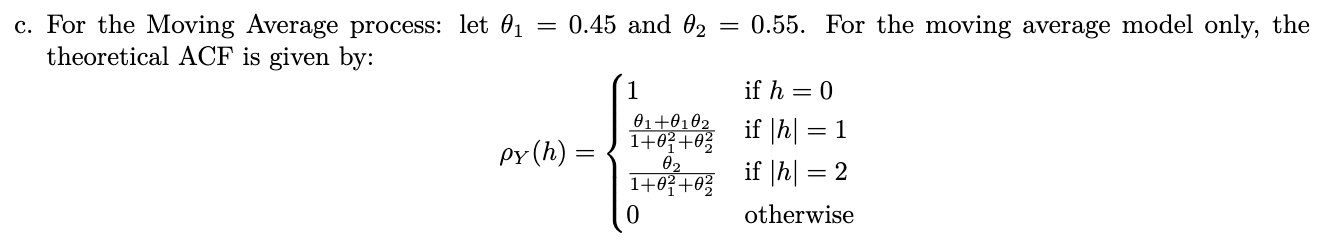

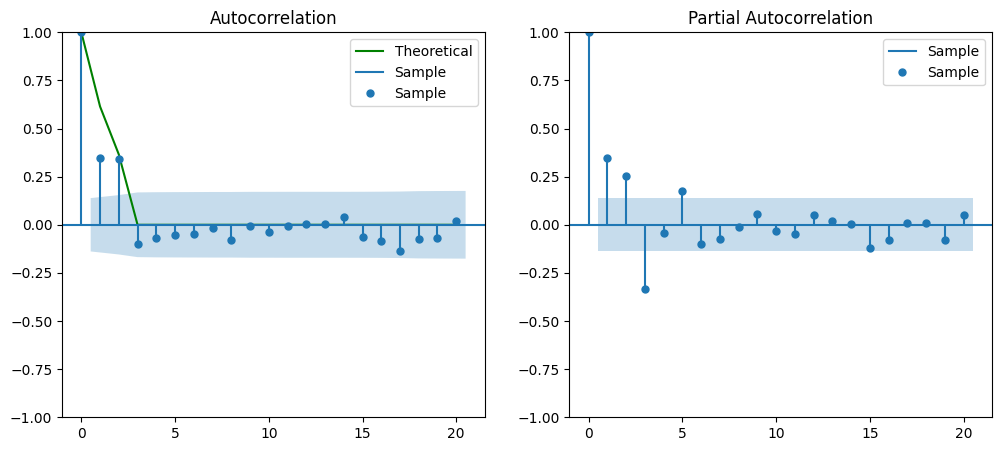

In [5]:
ar_params = [1] #Form of AR(0)
ma_params = [1, .45, .55] #Form of MA(2)

def theoretical_ma_acf_function(h, parameters):
    if h == 0:
        return 1
    elif abs(h) == 1:
        return ma_params[1] + ma_params[1] * ma_params[2] / (1 + ma_params[1]**2 + ma_params[2]**2)
    elif abs(h) == 2:
        return ma_params[2] / (1 + ma_params[1]**2 + ma_params[2]**2)
    else:
        return 0

theoretical_ma_acf = []
for h in range(21):
    theoretical_ma_acf.append(theoretical_ma_acf_function(h, ma_params))

ma = ArmaProcess(ar_params, ma_params)
simulated_ma_2 = ma.generate_sample(200)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(range(21), theoretical_ma_acf, color='green', label='Theoretical')
plot_acf(simulated_ma_2, lags=20, ax=ax1, label='Sample');
plot_pacf(simulated_ma_2, lags=20, ax=ax2, label='Sample');
ax1.legend()
ax2.legend()

plt.show()

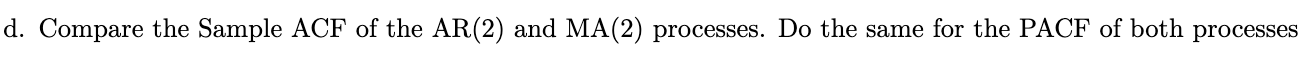

#### The sample ACF for the AR(2) process is signifcant for h<=3 and exhibits positive and negative values, while it is only significant for h<=2 for the MA(2) and is only positive (for the significant values). The sample ACF for the AR(2) process slowly goes towards zero while the drop for MA(2) is very abrupt. This is consistent with how the models are defined.

#### Conversely, the sample PACF is only significant for h<=2 and only negative for the significant values, while the sample PACF is significant for h=1,2 and 4, and shows a slower decay towards zero, while exhibiting both positive and negative significant values.

# Question 3

In [61]:
data = pd.read_csv('monthly-australian-wine-sales-th.csv')
data.drop(index=data.index[-1], inplace=True)

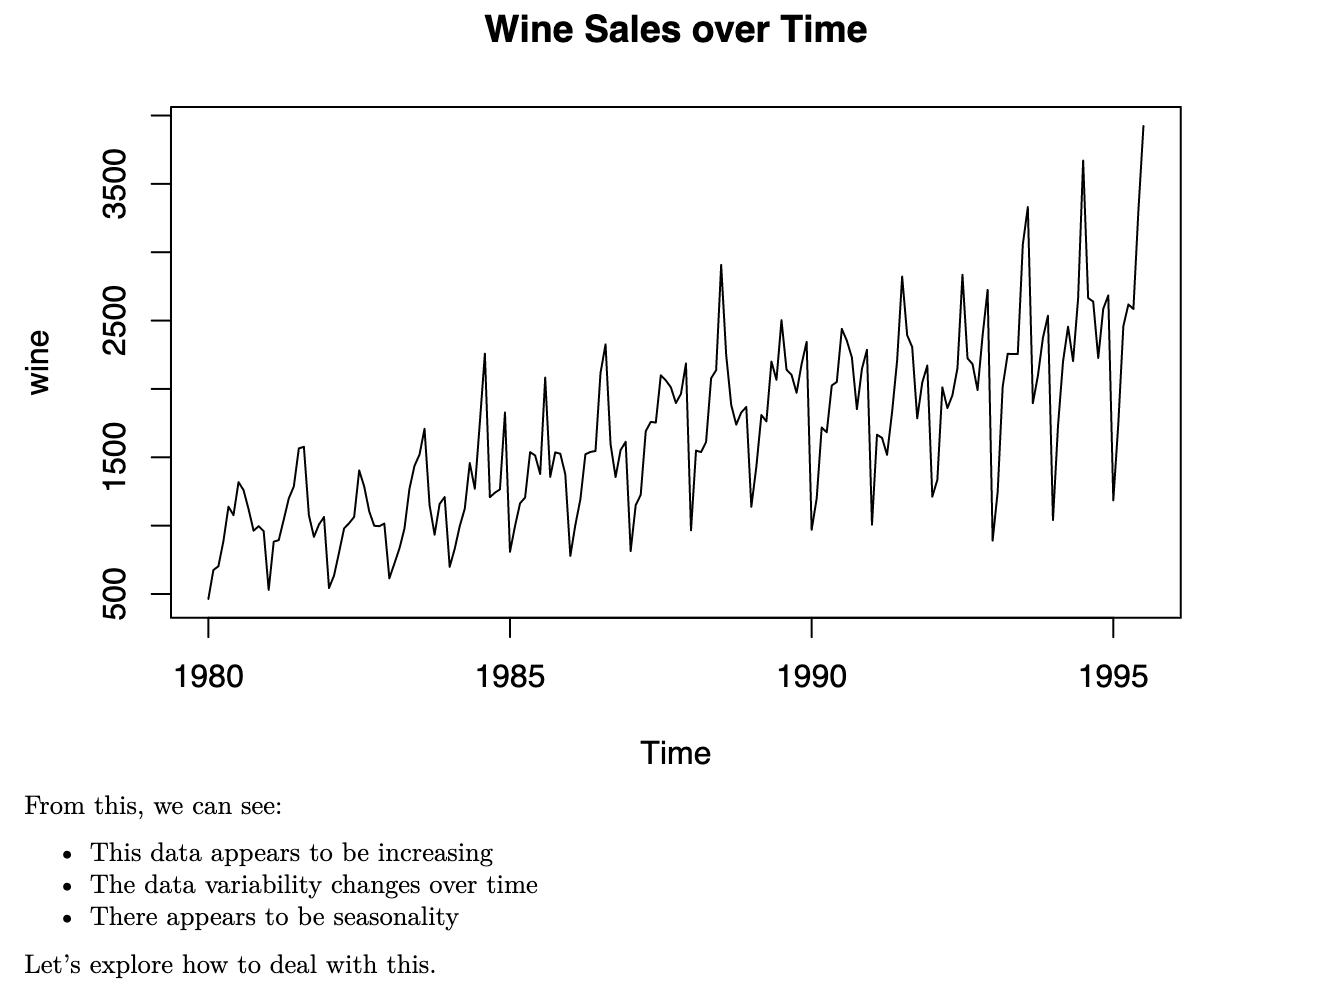

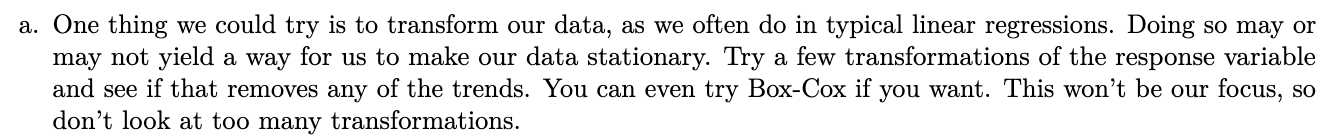

#### The boxcox transformaiton is very versatile but does not seem to fix the seasonality.

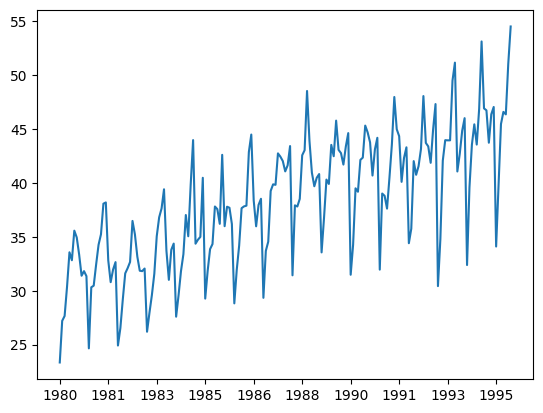

In [56]:
data_tf = sp.boxcox(data['Values'][:-1])

plt.plot(data['Month'][:-1],data_tf[0])
plt.xticks(data['Month'][::20], [str(x)[:-3] for x in data['Month'][::20]])
plt.show()

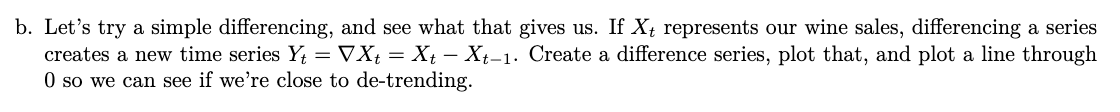

#### This does not seem to fix the issue either.

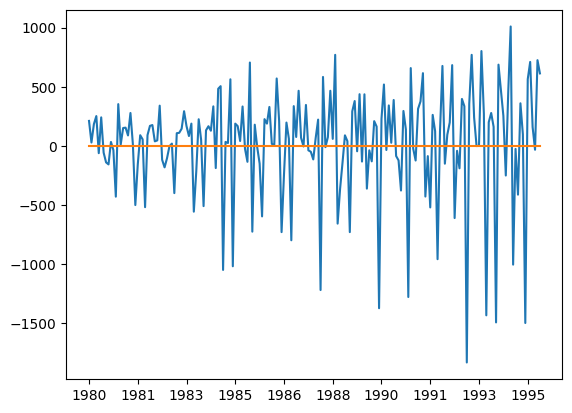

In [75]:
Y_t = []

for t in range(1,len(data)):
    Y_t.append(data['Values'][t] - data['Values'][t-1])

plt.plot(data['Month'][1:], Y_t)
plt.plot(range(len(data)-1), [0]*(len(data)-1))
plt.xticks(data['Month'][1::20], [str(x)[:-3] for x in data['Month'][1::20]])
plt.show()

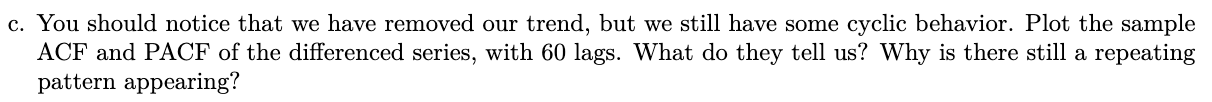

#### There seems to be a cyclical pattern with length of 12 months for the ACF. However, the PACF decays relatively fast towards zero. This is indicative of an AR(12) model. There is still a repeasting pattern because of the 12-month seasonal cycle inherent to the data.

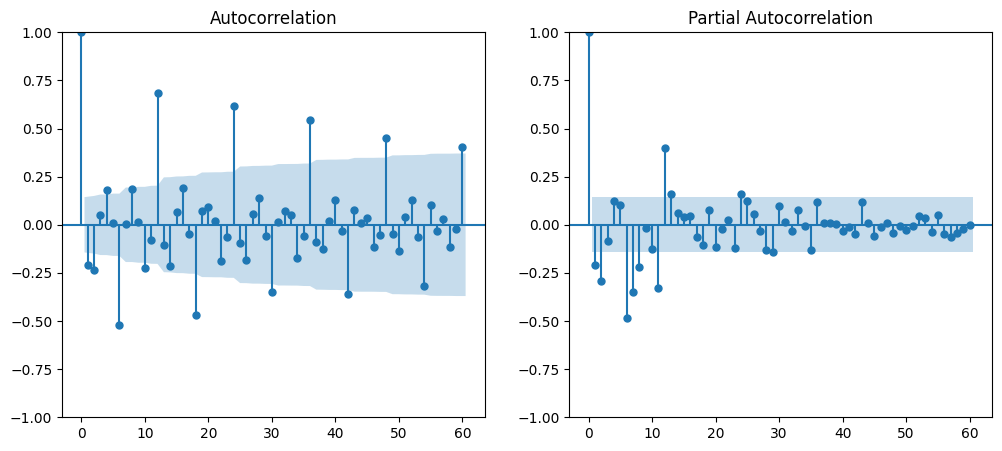

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_acf(Y_t, lags=60, ax=ax1);
plot_pacf(Y_t, lags=60, ax=ax2);

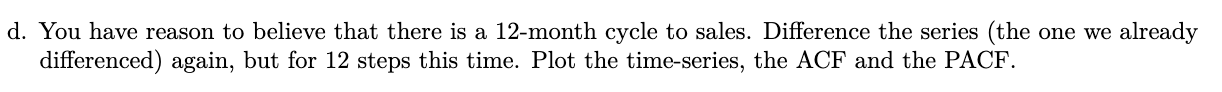

#### We can see that the AR(12)-like behavior show in the ACF is now gone.

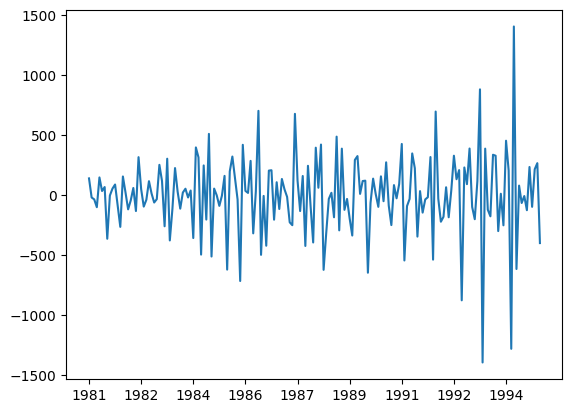

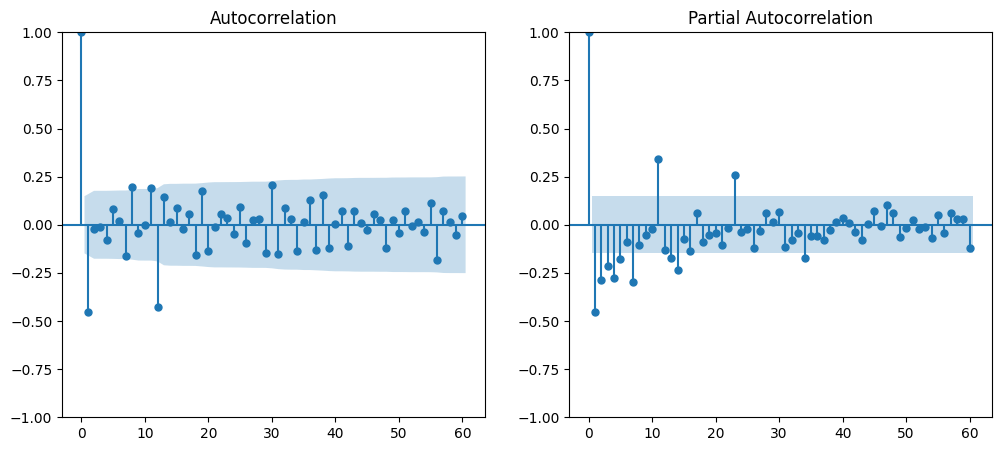

In [89]:
W_t = []

for i in range(12,len(Y_t)):
    W_t.append(
        Y_t[i] - Y_t[i-12]
    )

plt.plot(data['Month'][13:], W_t)
plt.xticks(data['Month'][13::20], [str(x)[:-3] for x in data['Month'][13::20]])
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plot_acf(W_t, lags=60, ax=ax1);
plot_pacf(W_t, lags=60, ax=ax2);

# Appendix

## 1.a

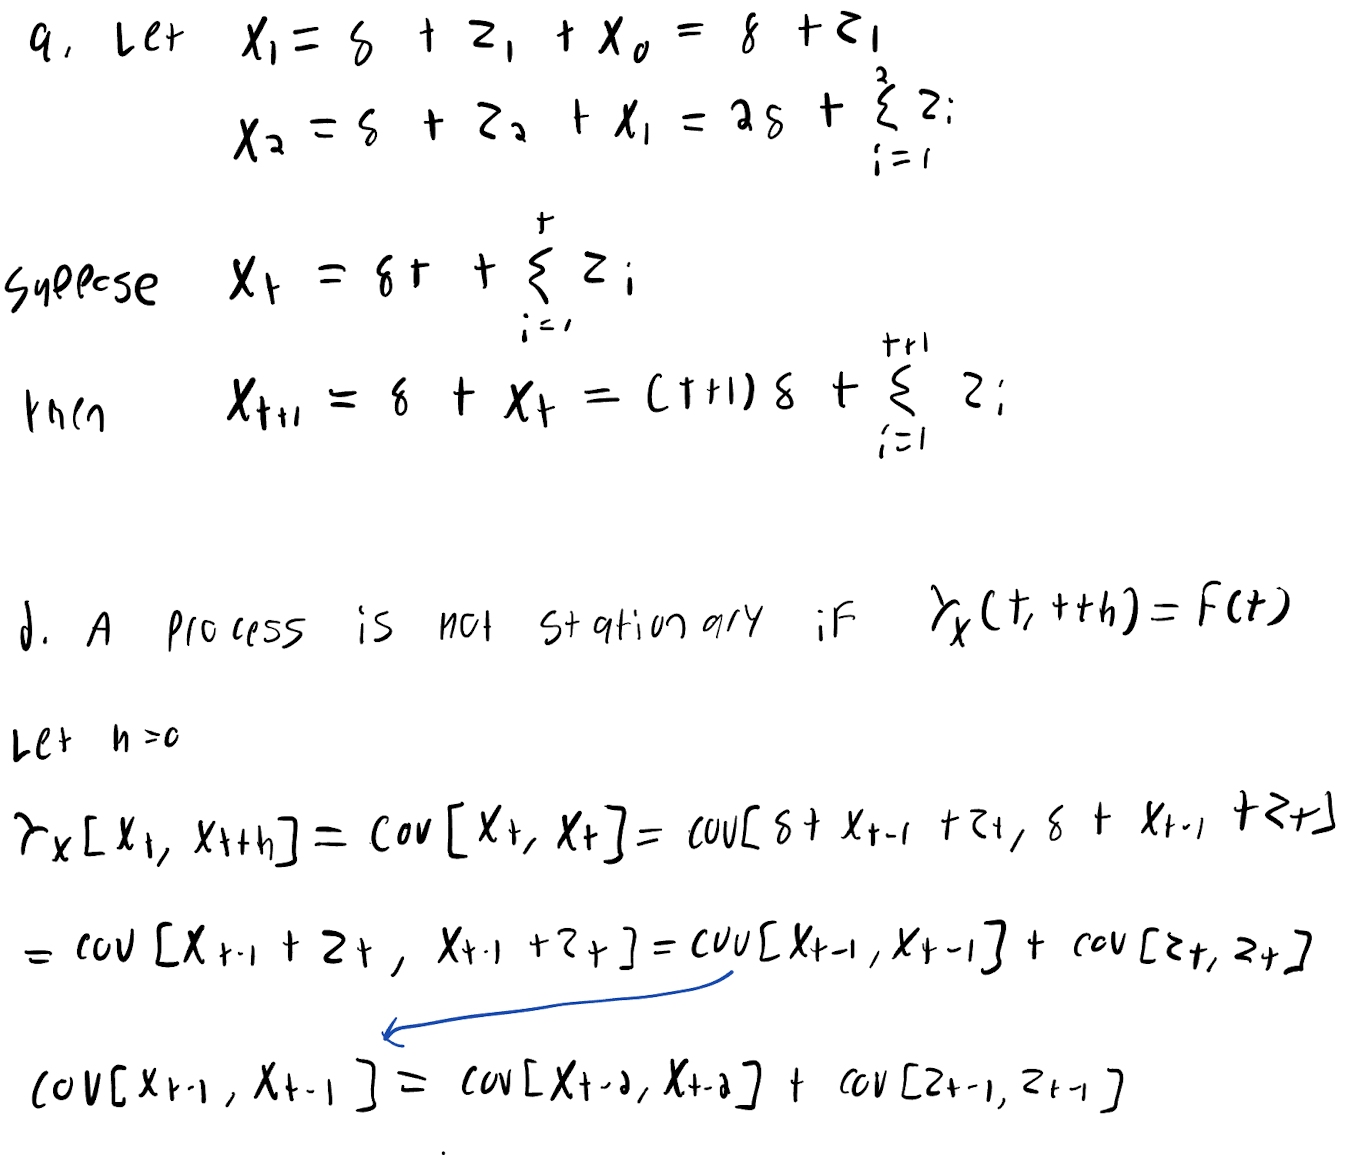

## 1.d

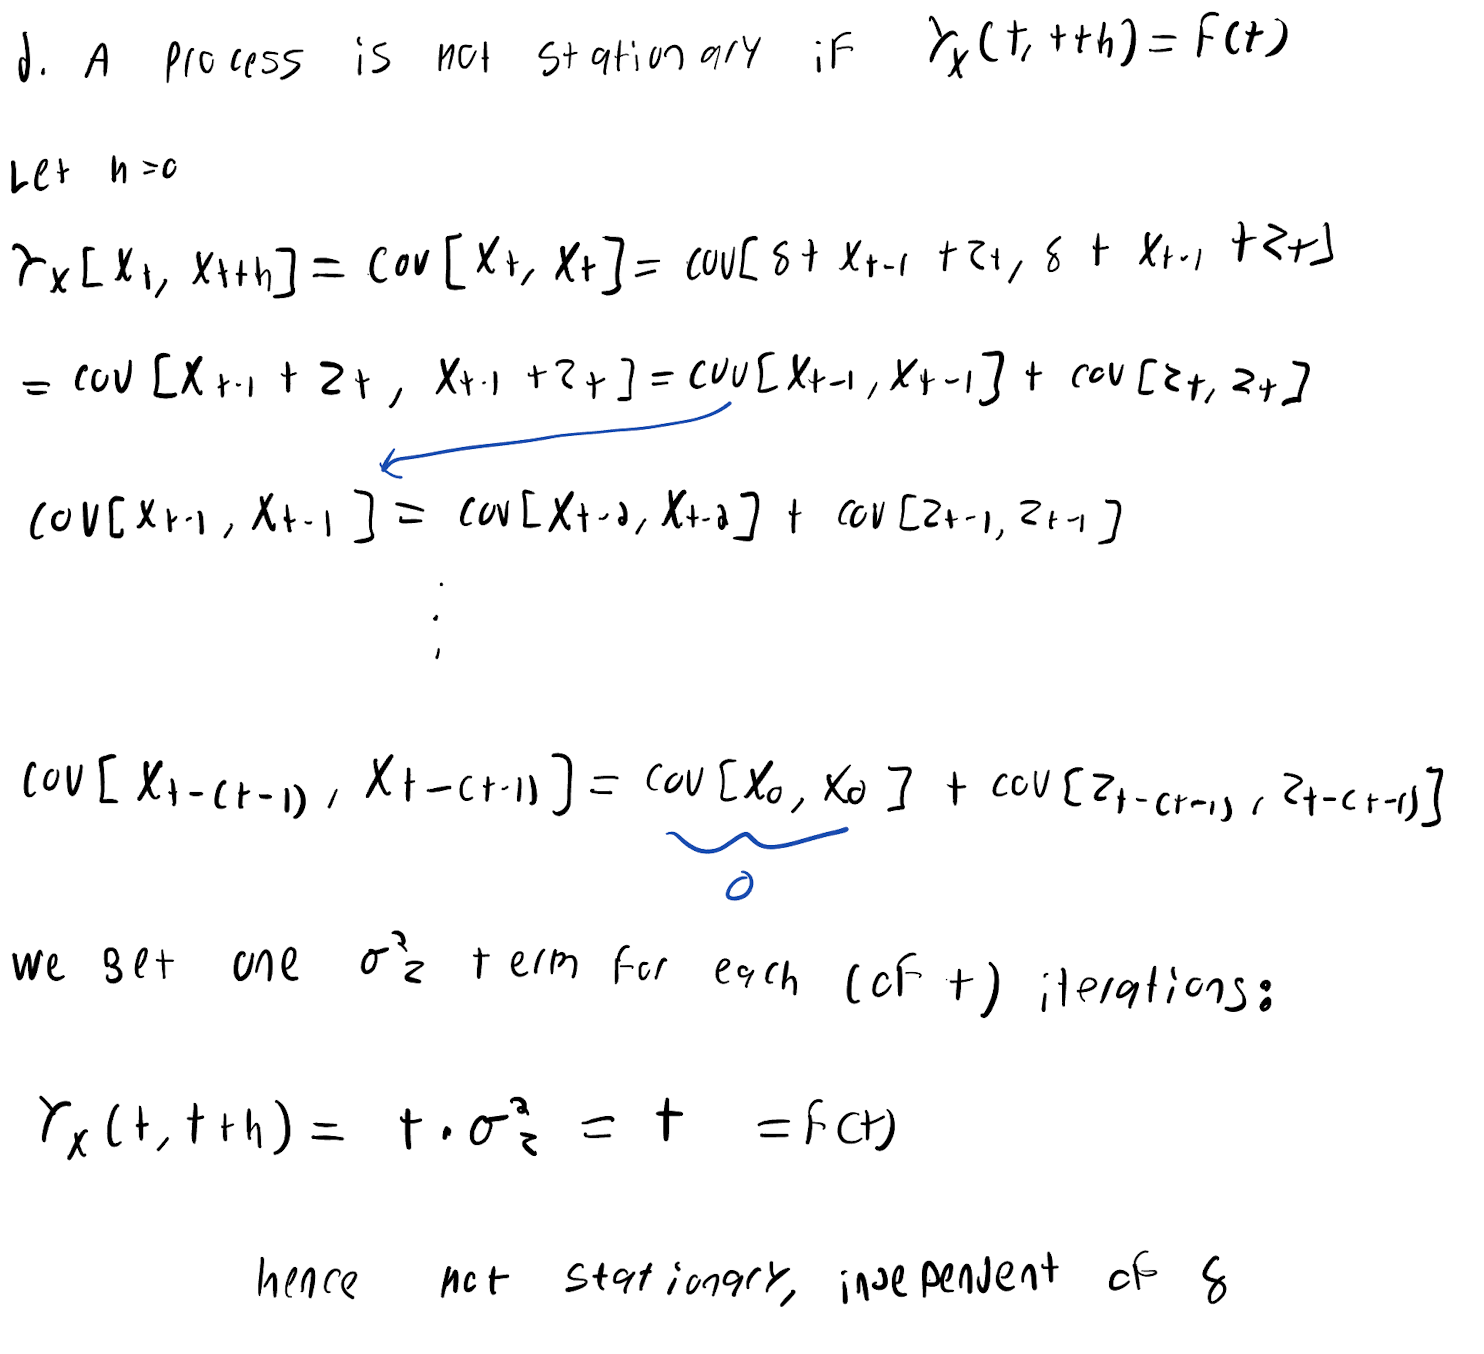

## 2.a

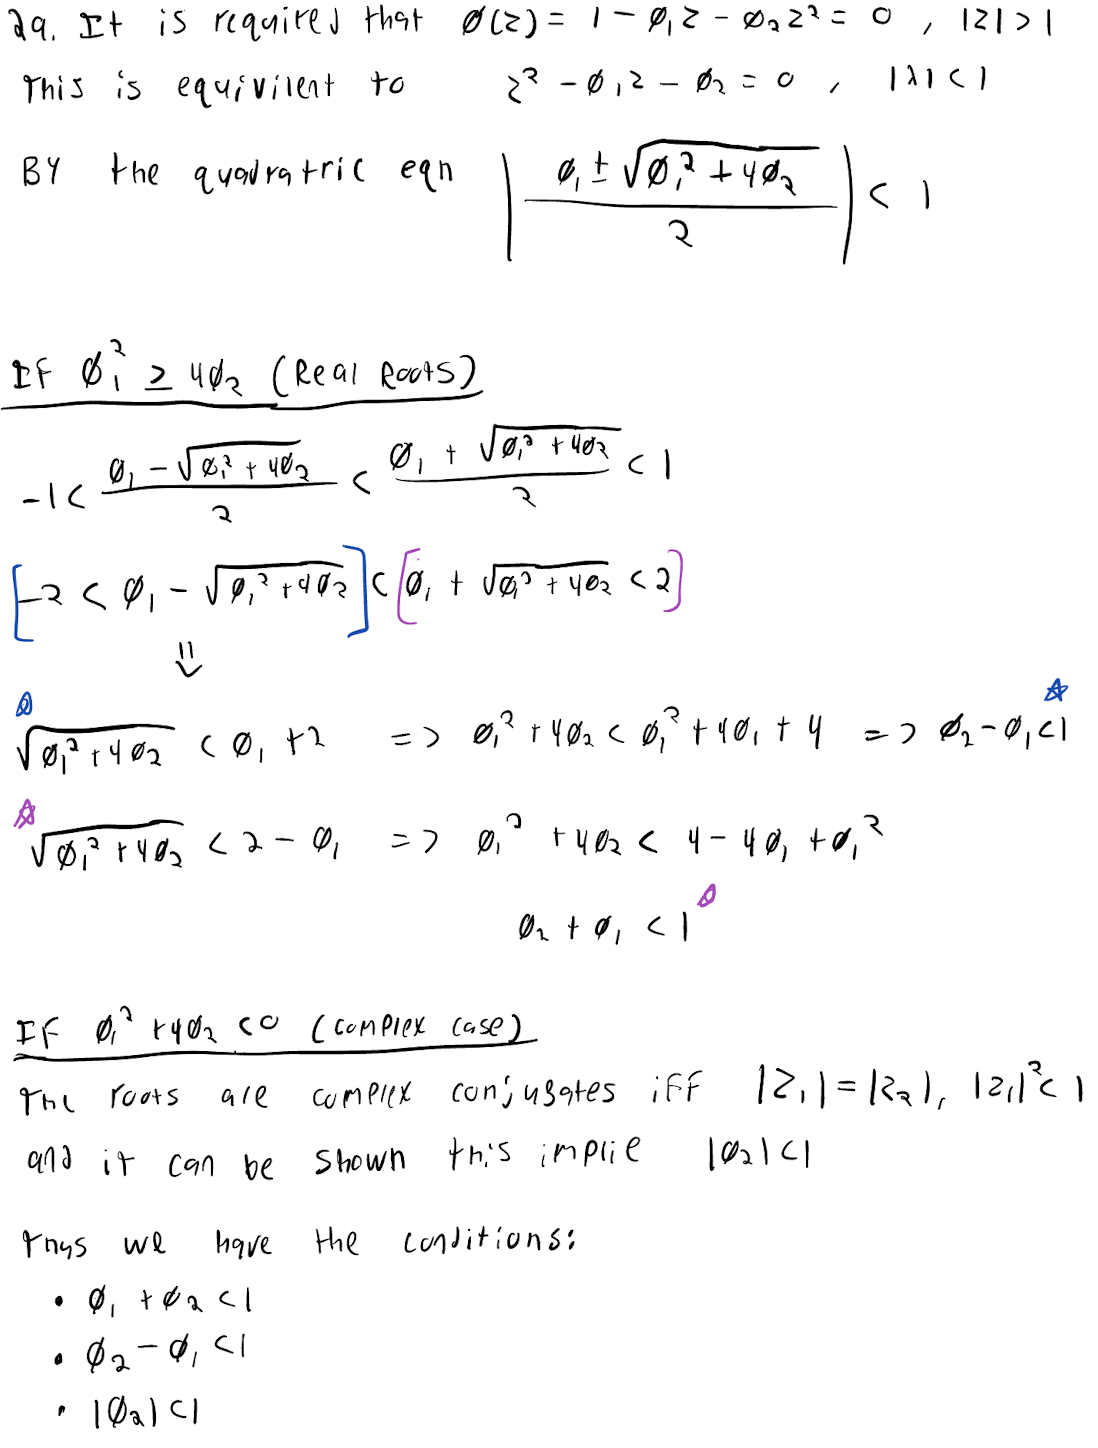